In [24]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature as skft
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC, SVR, LinearSVC

In [25]:
classes = ['aluminium_foil', 'brown_bread', 'corduroy', 'cotton', 'cracker', 'linen', 'orange_peel', 'sandpaper', 'sponge', 'styrofoam']
sample_numbers = ['15', '48', '42', '46', '60', '44', '55', '06', '21', '20']
# 10 classes in total, 81 pics in each class which contains 9 pics and each pic has 9 scales.
# for each class, use 7 pics to train and 2 to test

In [26]:
def load_data():
    # trian:test = 8:1
    train_data = []
    test_data = []
    train_label = []
    test_label = []
    for c in range(len(classes)):
        for p in range(1, 10):  # 9 different pics actually
            for s in range(1, 10):  # each pic has 9 scales
                path = './KTH-TIPS/kth_tips_grey_200x200/KTH_TIPS/' + classes[c] + '/' + sample_numbers[c] + '-scale_' + str(s) + '_im_' + str(p) + '_grey.png'
                img = plt.imread(path)
                if p < 9:
                    train_data.append(img)
                    train_label.append(c)
                else:
                    test_data.append(img)
                    test_label.append(c)
    return train_data, test_data, np.array(train_label), np.array(test_label)

In [71]:
radius = 1
n_point = radius * 8
def texture_detect(train_data, test_data):
    train_hist = np.zeros( (len(train_data), 256) )
    test_hist = np.zeros( (len(test_data), 256) )
    for i in range(len(train_data)):
        lbp = skft.local_binary_pattern(train_data[i], n_point, radius, 'default')
        max_bins = int(lbp.max() + 1)
        train_hist[i], _ = np.histogram(lbp, normed=True, bins=max_bins, range=(0, max_bins))
    for i in range(len(test_data)):
        lbp = skft.local_binary_pattern(test_data[i], n_point, radius, 'default')
        max_bins = int(lbp.max() + 1)
        test_hist[i], _ = np.histogram(lbp, normed=True, bins=max_bins, range=(0, max_bins))
    return train_hist, test_hist

In [28]:
def show_result(result, num):
    c = num // 9
    p = 9
    s = num % 9 + 1
    path = './KTH-TIPS/kth_tips_grey_200x200/KTH_TIPS/' + classes[c] + '/' + sample_numbers[c] + '-scale_' + str(s) + '_im_' + str(p) + '_grey.png'
    print(path)
    img = plt.imread(path)
    cl = classes[result[num]]
    plt.figure()
    plt.title(cl)
    plt.imshow(img, cmap='gray')
    plt.show()

<ipython-input-27-ae1ffe5378eb>:10: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  train_hist[i], _ = np.histogram(lbp, normed=True, bins=max_bins, range=(0, max_bins))
<ipython-input-27-ae1ffe5378eb>:14: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  test_hist[i], _ = np.histogram(lbp, normed=True, bins=max_bins, range=(0, max_bins))


0.8333333333333334
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 9 6 0
 0 0 0 0 0 4 4 4 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 1 1 9 7 7 7 7 7 9 4 8
 8 8 8 8 8 8 8 4 9 9 9 9 9 9 9 9]
./KTH-TIPS/kth_tips_grey_200x200/KTH_TIPS/aluminium_foil/15-scale_1_im_9_grey.png


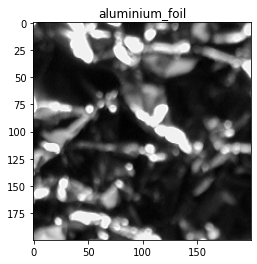

In [29]:
train_data, test_data, train_label, test_label = load_data()
train_hist, test_hist = texture_detect(train_data, test_data)

model = OneVsRestClassifier(SVR(kernel='rbf', C=1e3, gamma=0.1))
model = model.fit(train_hist, train_label)
acc = model.score(test_hist, test_label)
result = model.predict(test_hist)

print(acc)
print(result)
# show_result(result, 0) # choose a predict result to show(0~89)


In [73]:
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 9, 6, 0, 0, 0, 0, 0, 0, 4, 4,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 1, 9,
       7, 7, 7, 7, 7, 9, 4, 8, 8, 8, 8, 8, 8, 8, 8, 4, 9, 9, 9, 9, 9, 9,
       9, 9])